# Data understanding and EDA

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Importing required libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
os.listdir()

['.config', 'drive', 'sample_data']

In [7]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Niyatikayastha/Food_Time_Data_Set.csv.crdownload')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Unnamed: 14,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,NaN,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,NaN,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,NaN,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,NaN,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,NaN,High,9.89,43.45


In [8]:
df.shape

(4659, 18)

In [9]:
df.isnull().sum()

,0
ID,0
Delivery_person_ID,1
Delivery_person_Age,1
Delivery_person_Ratings,1
Restaurant_latitude,1
Restaurant_longitude,1
Delivery_location_latitude,1
Delivery_location_longitude,1
Type_of_order,1
Type_of_vehicle,1


In [10]:
# Remove categorical columns and 'Year' column
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df.drop(columns=categorical_columns, inplace=True)  # Dropping categorical columns  # Dropping 'Year' column

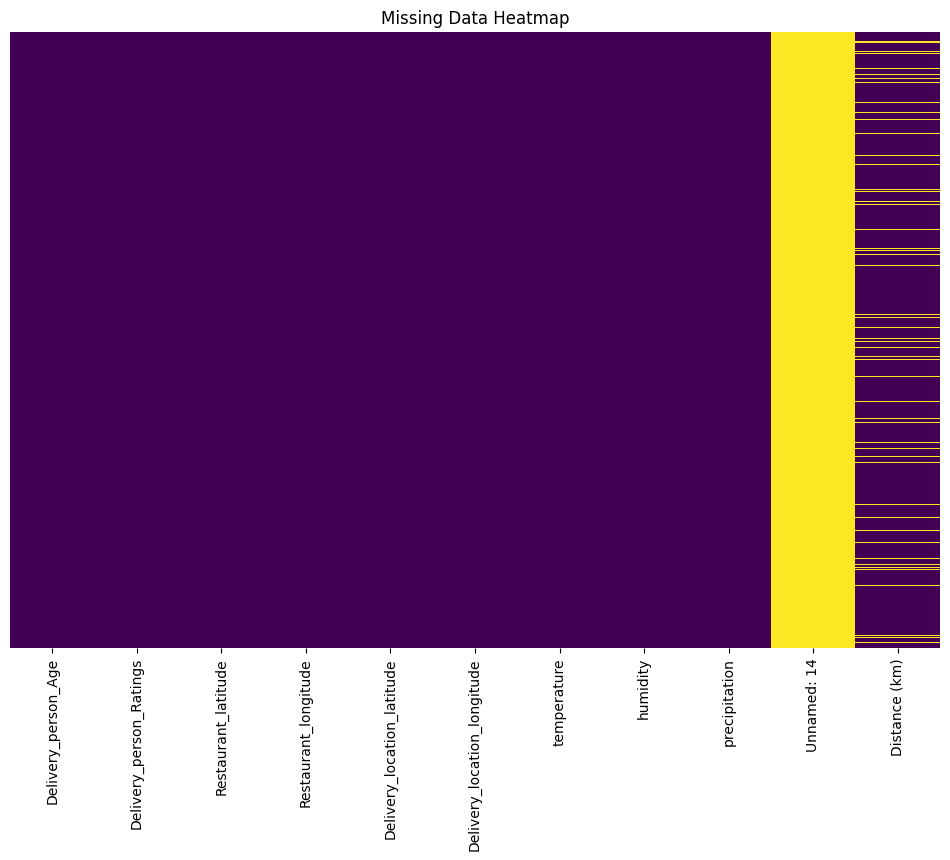

In [11]:
# Plot heatmap for missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

In [12]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Identify columns with more than 10% missing values
columns_to_drop = missing_percentage[missing_percentage > 10].index

# Drop the columns with more than 10% missing values
df.drop(columns=columns_to_drop, inplace=True)

# Display the columns that were dropped
print(f"Columns with more than 10% missing values: {columns_to_drop.tolist()}")

# Show the cleaned DataFrame shape
print(f"Cleaned DataFrame shape: {df.shape}")

Columns with more than 10% missing values: ['Unnamed: 14']
Cleaned DataFrame shape: (4659, 10)


In [13]:
from sklearn.impute import SimpleImputer

# Impute missing values for numerical columns using median
numerical_imputer = SimpleImputer(strategy='median')

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Apply the imputer to the numerical columns
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Check if any categorical columns exist and impute if necessary
categorical_columns = df.select_dtypes(include=['object']).columns

# Only perform categorical imputation if there are categorical columns
if categorical_columns.size > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])
else:
    print("No categorical columns to impute.")

# Check the missing values after imputation
print(f"Missing values after imputation: \n{df.isnull().sum()}")

No categorical columns to impute.
Missing values after imputation: 
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
temperature                    0
humidity                       0
precipitation                  0
Distance (km)                  0
dtype: int64


In [14]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km)
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,17.11,77.0,0.0,13.34
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19.50,93.0,0.0,37.17
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,20.45,91.0,0.0,3.34
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,23.86,78.0,0.0,10.05
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26.55,87.0,0.0,9.89


## Basic visualizations after cleaned df

In [15]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km)
count,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000,4659.000000
mean,29.441726,4.631380,16.889973,69.851252,17.345343,70.481315,21.648862,68.827645,0.002518,14.224748
std,5.667147,0.320962,8.299619,23.457897,7.451690,21.699037,3.498491,15.897783,0.016552,8.028297
min,15.000000,1.000000,-30.902872,-88.322337,0.010000,0.010000,6.910000,39.000000,0.000000,1.570000
25%,25.000000,4.500000,12.906229,73.170000,12.965946,73.280937,18.950000,56.000000,0.000000,8.205000
50%,29.000000,4.700000,18.543626,75.897429,18.618123,75.996531,21.270000,68.000000,0.000000,13.340000
75%,34.000000,4.800000,22.727021,78.011576,22.784244,78.077044,25.000000,83.000000,0.000000,18.995000
max,50.000000,6.000000,30.914057,88.433452,31.035562,88.563452,27.840000,94.000000,0.120000,59.840000


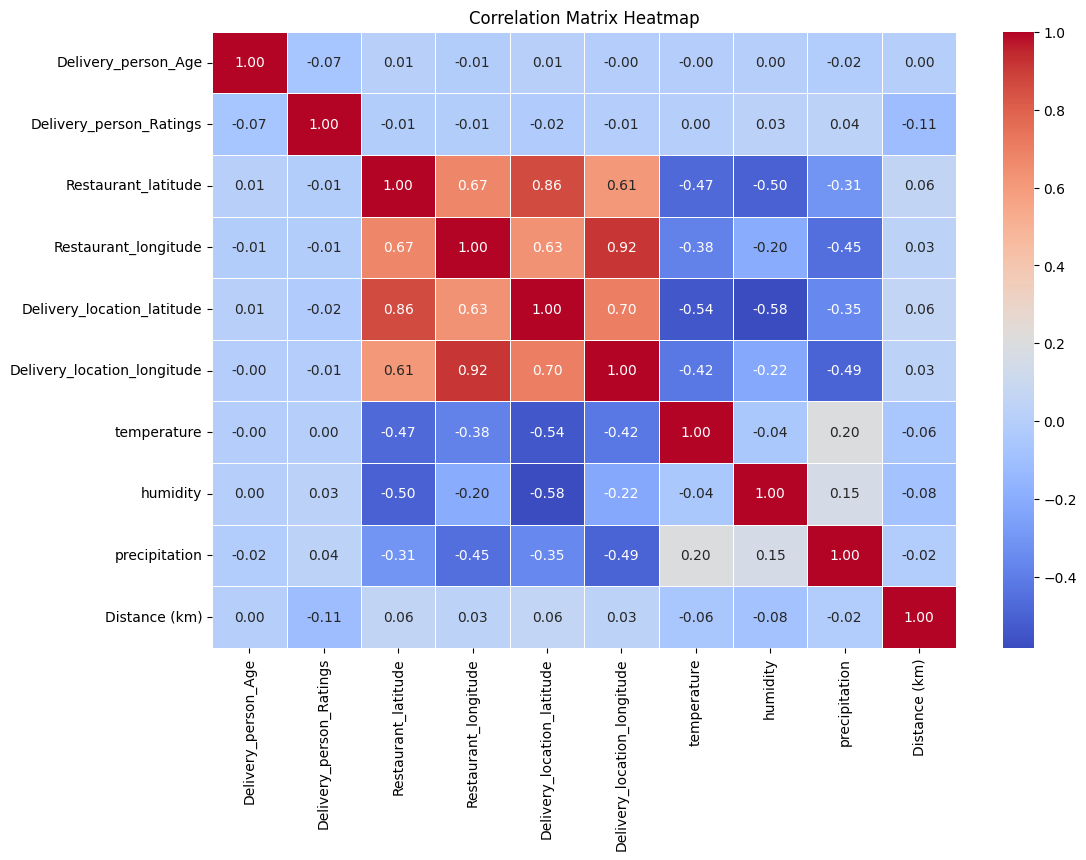

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the heatmap
plt.title("Correlation Matrix Heatmap")
plt.show()

# Outliers Detection

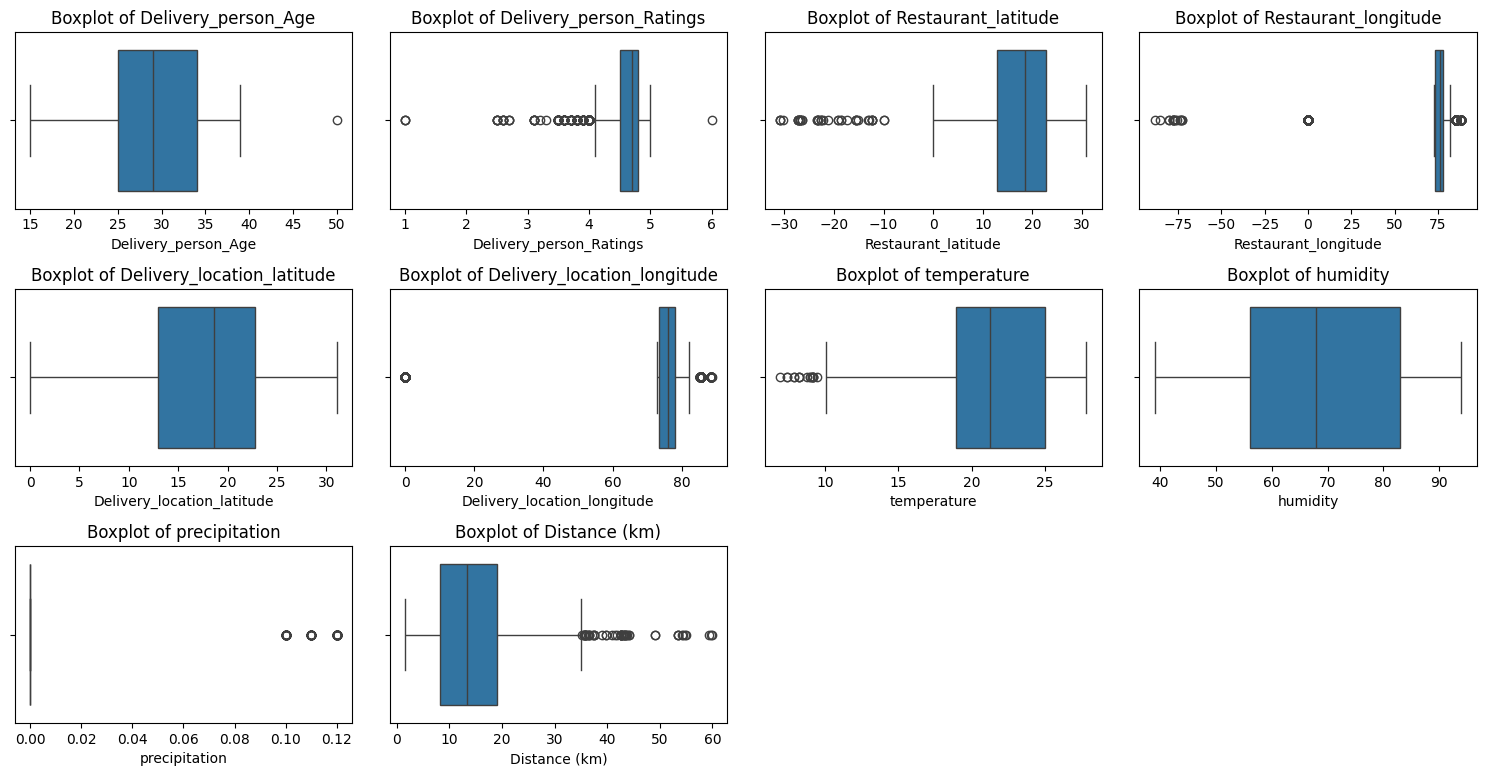

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for each numerical column to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)  # Adjust the layout according to the number of columns
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Fixing outliers

In [18]:
# Calculate IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect and fix outliers by capping them to the lower and upper bounds
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Check missing values after outlier handling
print(f"Missing values after outlier handling: \n{df.isnull().sum()}")

Missing values after outlier handling: 
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
temperature                    0
humidity                       0
precipitation                  0
Distance (km)                  0
dtype: int64


# Model Building

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Splitting the data for model into train and split

In [20]:
# Splitting dataset

X = df.drop(columns=["Restaurant_latitude"])  # Features
y = df["Restaurant_latitude"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Add bias term
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

def cost_function(X, Y, W):
    m = len(Y)
    Y_pred = np.dot(X, W)
    cost = (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2)
    return cost

def gradient_descent(X, Y, W, alpha, iterations):
    m = len(Y)
    cost_history = []
    for i in range(iterations):
        Y_pred = np.dot(X, W)
        loss = Y_pred - Y
        gradient = (1 / m) * np.dot(X.T, loss)
        W -= alpha * gradient
        cost = cost_function(X, Y, W)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    return W, cost_history

def rmse(Y, Y_pred):
    return np.sqrt(mean_squared_error(Y, Y_pred))

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

def main():
    W = np.zeros(X_train_bias.shape[1])
    alpha = 0.01
    iterations = 2000
    W_optimal, cost_history = gradient_descent(X_train_bias, y_train.values, W, alpha, iterations)

    # Plot cost function over iterations
    plt.plot(range(iterations), cost_history, label='Cost Reduction Over Iterations', color='blue')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.title('Gradient Descent Convergence')
    plt.legend()
    plt.show()

    # Predictions
    Y_pred_train = np.dot(X_train_bias, W_optimal)
    Y_pred_test = np.dot(X_test_bias, W_optimal)

    # Training metrics
    train_mse = mean_squared_error(y_train, Y_pred_train)
    train_rmse = np.sqrt(train_mse)  # RMSE
    train_r2 = r2_score(y_train, Y_pred_train)

    # Test metrics
    test_mse = mean_squared_error(y_test, Y_pred_test)
    test_rmse = np.sqrt(test_mse)  # RMSE
    test_r2 = r2_score(y_test, Y_pred_test)

    # Print results
    print("Final Weights:", W_optimal)
    print("MSE on Training Set:", train_mse)
    print("RMSE on Training Set:", train_rmse)
    print("R-Squared on Training Set:", train_r2)
    print()
    print("MSE on Test Set:", test_mse)
    print("RMSE on Test Set:", test_rmse)
    print("R-Squared on Test Set:", test_r2)
    # Check for infinite values
    print(np.any(np.isinf(y_train)))
    print(np.any(np.isinf(Y_pred_train)))

Iteration 0: Cost = 170.8541
Iteration 100: Cost = 23.3933
Iteration 200: Cost = 6.0246
Iteration 300: Cost = 3.5962
Iteration 400: Cost = 3.1522
Iteration 500: Cost = 2.9923
Iteration 600: Cost = 2.8864
Iteration 700: Cost = 2.8007
Iteration 800: Cost = 2.7283
Iteration 900: Cost = 2.6663
Iteration 1000: Cost = 2.6126
Iteration 1100: Cost = 2.5658
Iteration 1200: Cost = 2.5247
Iteration 1300: Cost = 2.4881
Iteration 1400: Cost = 2.4554
Iteration 1500: Cost = 2.4258
Iteration 1600: Cost = 2.3989
Iteration 1700: Cost = 2.3742
Iteration 1800: Cost = 2.3513
Iteration 1900: Cost = 2.3301


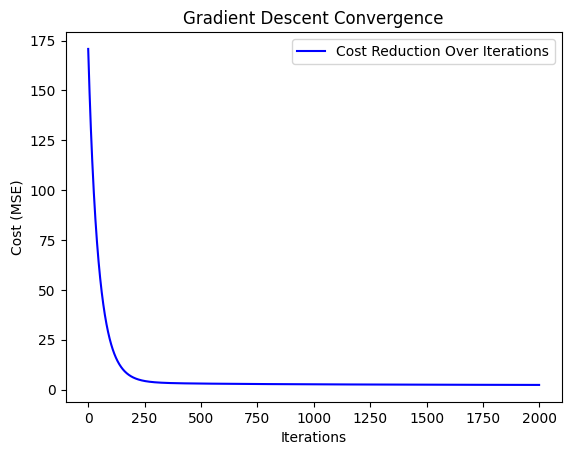

Final Weights: [ 1.71041511e+01  3.22852051e-02  3.50439259e-02  2.17489100e+00
  6.45303062e+00 -1.73306692e+00 -3.15125406e-01 -5.70889559e-01
  0.00000000e+00 -1.52871430e-02]
MSE on Training Set: 4.620841954833311
RMSE on Training Set: 2.149614373517564
R-Squared on Training Set: 0.9191134437502495

MSE on Test Set: 3.825660160121555
RMSE on Test Set: 1.9559294875126647
R-Squared on Test Set: 0.939310776064209
False
False


In [24]:
if __name__ == "__main__":
    main()

## Models using sklearn

## Linear regression Model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on training and test sets
y_pred_train_lr = lr_model.predict(X_train_scaled)
y_pred_test_lr = lr_model.predict(X_test_scaled)

# Calculate metrics for Linear Regression
train_mse_lr = mean_squared_error(y_train, y_pred_train_lr)
train_rmse_lr = np.sqrt(train_mse_lr)
train_r2_lr = r2_score(y_train, y_pred_train_lr)

test_mse_lr = mean_squared_error(y_test, y_pred_test_lr)
test_rmse_lr = np.sqrt(test_mse_lr)
test_r2_lr = r2_score(y_test, y_pred_test_lr)

# Print results for Linear Regression
print("Linear Regression Results:")
print(f"MSE on Training Set: {train_mse_lr}")
print(f"RMSE on Training Set: {train_rmse_lr}")
print(f"R-Squared on Training Set: {train_r2_lr}")
print()
print(f"MSE on Test Set: {test_mse_lr}")
print(f"RMSE on Test Set: {test_rmse_lr}")
print(f"R-Squared on Test Set: {test_r2_lr}")

Linear Regression Results:
MSE on Training Set: 3.5269322493819026
RMSE on Training Set: 1.878012845904389
R-Squared on Training Set: 0.9382620296112293

MSE on Test Set: 3.1380474832896406
RMSE on Test Set: 1.7714534945320017
R-Squared on Test Set: 0.9502188750533296


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on training and test sets
y_pred_train_rf = rf_model.predict(X_train_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

# Calculate metrics for Random Forest
train_mse_rf = mean_squared_error(y_train, y_pred_train_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_r2_rf = r2_score(y_train, y_pred_train_rf)

test_mse_rf = mean_squared_error(y_test, y_pred_test_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

# Print results for Random Forest
print("Random Forest Results:")
print(f"MSE on Training Set: {train_mse_rf}")
print(f"RMSE on Training Set: {train_rmse_rf}")
print(f"R-Squared on Training Set: {train_r2_rf}")
print()
print(f"MSE on Test Set: {test_mse_rf}")
print(f"RMSE on Test Set: {test_rmse_rf}")
print(f"R-Squared on Test Set: {test_r2_rf}")

Random Forest Results:
MSE on Training Set: 0.598651995909321
RMSE on Training Set: 0.7737260470666094
R-Squared on Training Set: 0.9895207629227624

MSE on Test Set: 2.7103270430940962
RMSE on Test Set: 1.6463070925845202
R-Squared on Test Set: 0.9570041148526006


# Hyper-parameter Optimization with Cross-Validation

## Linear Regression (Ridge)

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Hyperparameters for Ridge Regression
ridge_param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000]  # Range of values for regularization strength
}

# Initialize Ridge model
ridge_model = Ridge()

# Apply GridSearchCV
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
print(f"Best hyperparameters for Ridge Regression: {ridge_grid_search.best_params_}")

Best hyperparameters for Ridge Regression: {'alpha': 1}


## Random Forest

In [28]:
# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [10],  # Number of trees
    'max_depth': [10],  # Maximum depth of the tree
    'min_samples_split': [2],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1],  # Minimum number of samples required to be at a leaf node
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print(best_rf)

RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)


# Feature Selection

In [29]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select K best features using f_regression
k =10 # Number of features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Display selected feature names
selected_features = X_train.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")

Selected Features: Index(['Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'temperature', 'humidity',
       'precipitation', 'Distance (km)'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


##  Linear Regression Model (with selected features and optimal hyperparameters)

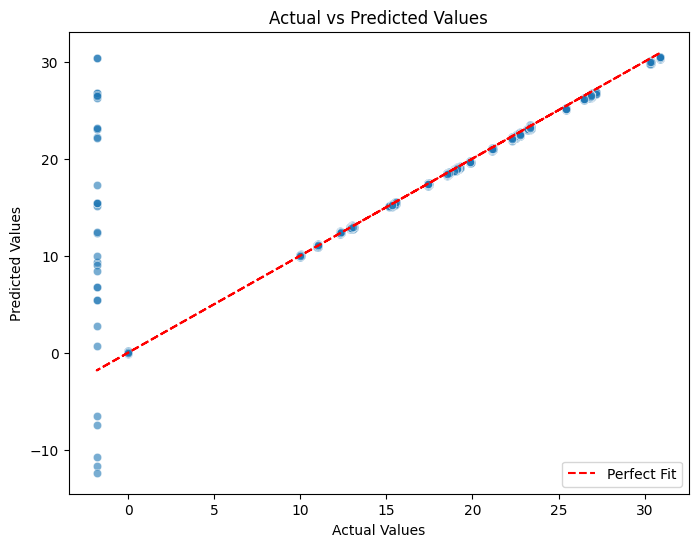

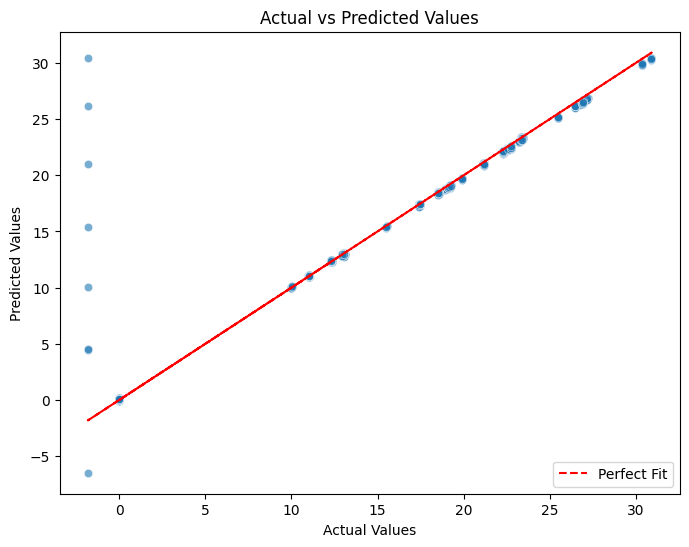

Final Ridge Regression Results:
Training Metrics: {'Mean Absolute Error (MAE)': 0.3230188923996107, 'Mean Squared Error (MSE)': 3.5275407501782383, 'Root Mean Squared Error (RMSE)': 1.8781748454758513, 'R-squared Score': 0.9382513779736334}
Test Metrics: {'Mean Absolute Error (MAE)': 0.3063582933167528, 'Mean Squared Error (MSE)': 3.14173239569275, 'Root Mean Squared Error (RMSE)': 1.7724932709865924, 'R-squared Score': 0.9501604186132235}


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def model_evaluation(y_true, y_pred):
    """
    Evaluates a regression model using various metrics and visualizes results.

    Parameters:
    y_true (array-like): True values.
    y_pred (array-like): Predicted values by the model.

    Returns:
    dict: A dictionary containing MAE, MSE, RMSE, and R-squared score.
    """
    metrics = {
        "Mean Absolute Error (MAE)": mean_absolute_error(y_true, y_pred),
        "Mean Squared Error (MSE)": mean_squared_error(y_true, y_pred),
        "Root Mean Squared Error (RMSE)": mean_squared_error(y_true, y_pred) ** 0.5,
        "R-squared Score": r2_score(y_true, y_pred)
    }

    # Visualization
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.plot(y_true, y_true, color='red', linestyle='--', label='Perfect Fit')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.legend()
    plt.show()

    return metrics

# Ridge Regression Model Training
alpha_optimal = 1.0  # Adjust based on hyperparameter tuning results

ridge_model_final = Ridge(alpha=alpha_optimal)
ridge_model_final.fit(X_train_selected, y_train)

# Predict on training and test sets
y_pred_train_ridge_final = ridge_model_final.predict(X_train_selected)
y_pred_test_ridge_final = ridge_model_final.predict(X_test_selected)

# Evaluate the final Ridge Regression model
train_metrics = model_evaluation(y_train, y_pred_train_ridge_final)
test_metrics = model_evaluation(y_test, y_pred_test_ridge_final)

# Print Results
print("Final Ridge Regression Results:")
print("Training Metrics:", train_metrics)
print("Test Metrics:", test_metrics)


In [31]:
# Hyperparameter Tuning on Selected Features
grid_search_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='r2'
)

# Fit on selected features
grid_search_rf.fit(X_train_selected, y_train)

# Get the best trained model
best_rf = grid_search_rf.best_estimator_
print("Best Parameters:", grid_search_rf.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


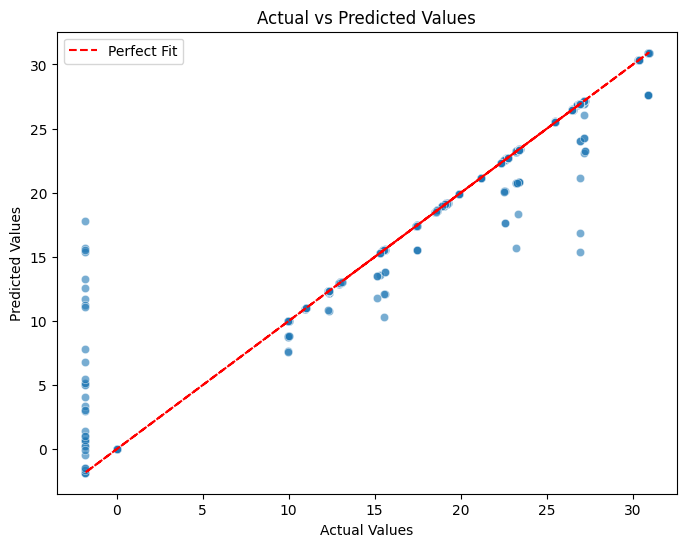

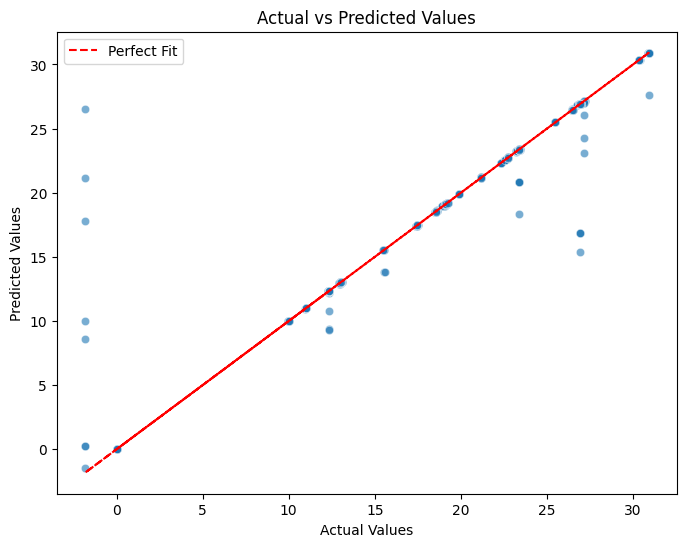

Train Metrics: {'Mean Absolute Error (MAE)': 0.11322278340240756, 'Mean Squared Error (MSE)': 0.9360200221718927, 'Root Mean Squared Error (RMSE)': 0.9674812774270584, 'R-squared Score': 0.9836152292343375}
Test Metrics: {'Mean Absolute Error (MAE)': 0.19749304023251932, 'Mean Squared Error (MSE)': 2.705601485795444, 'Root Mean Squared Error (RMSE)': 1.644871267241131, 'R-squared Score': 0.957079079798026}


In [32]:
# Train the final model
final_rf_model = best_rf  # Already tuned
final_rf_model.fit(X_train_selected, y_train)

# Make predictions
y_train_pred = final_rf_model.predict(X_train_selected)
y_test_pred = final_rf_model.predict(X_test_selected)

# Evaluate model
train_metrics = model_evaluation(y_train, y_train_pred)
test_metrics = model_evaluation(y_test, y_test_pred)

print("Train Metrics:", train_metrics)
print("Test Metrics:", test_metrics)
